<a href="https://colab.research.google.com/github/seung9-ann/Self-Studying-for-ML-with-Python/blob/main/Introduction_to_ML_with_Python_ww04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3. 비지도학습

###데이터 전처리와 스케일 조정

In [28]:
import numpy as np
import pandas as pd
!pip install mglearn
import mglearn
import matplotlib.pyplot as plt

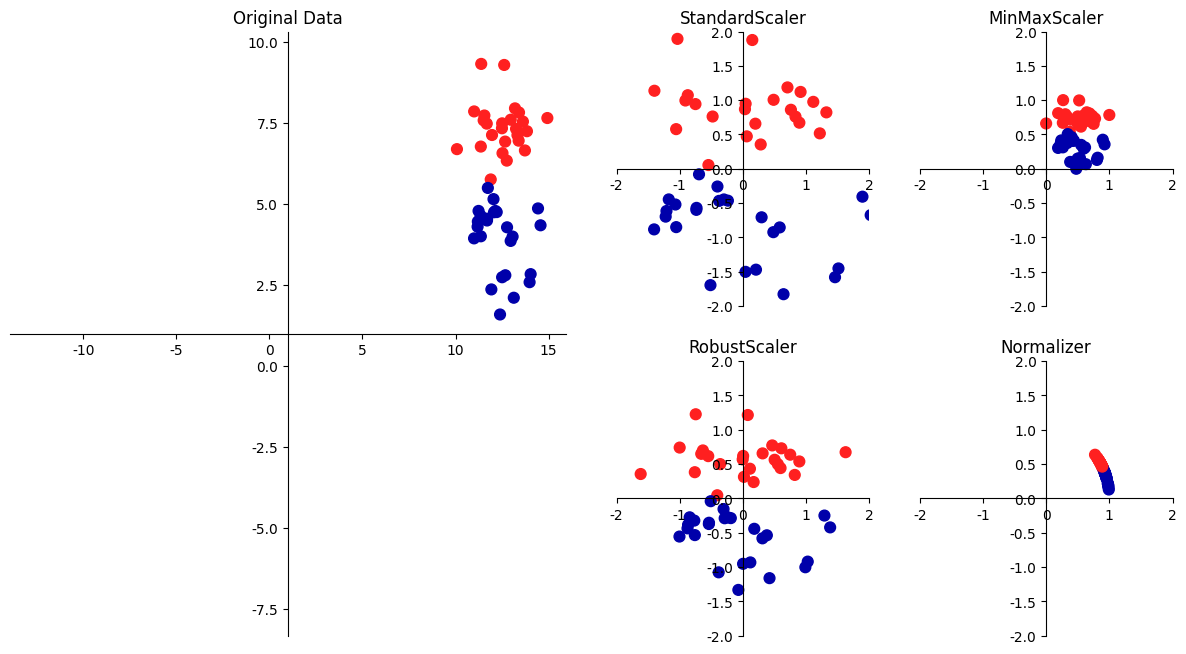

In [29]:
mglearn.plots.plot_scaling() # 스케일링의 예시

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [32]:
X_train_scaled = scaler.transform(X_train) # 데이터 변환

print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))       

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [33]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

# 왜 테스트 세트는 0~1사이가 아닌가? 바로바로 스케일러 변환 학습을 안했기 때무운!

스케일 조정 후 특성별 최소값:
 [ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 후 특성별 최대값:
 [0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


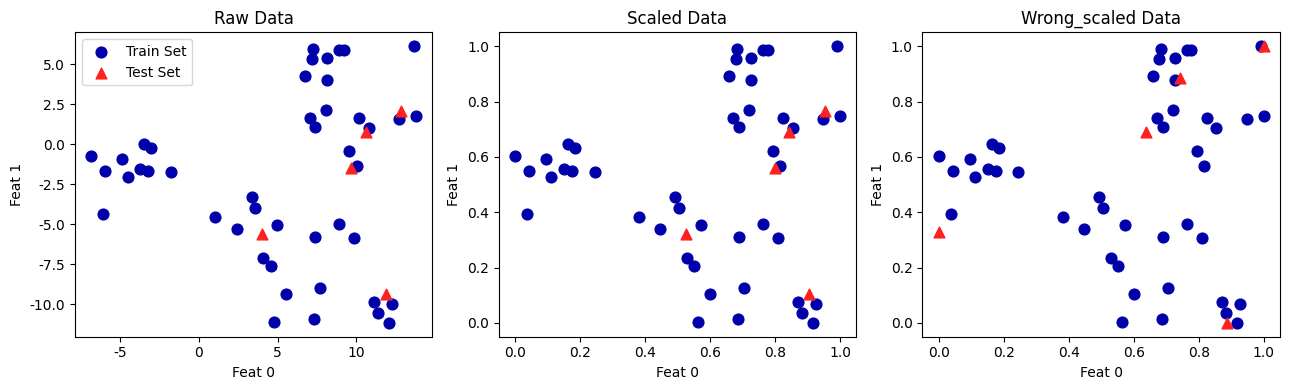

In [35]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="Train Set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="Test Set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Raw Data")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="Train Set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="Test Set", s=60)
axes[1].set_title("Scaled Data")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("Wrong_scaled Data")

for ax in axes:
    ax.set_xlabel("Feat 0")
    ax.set_ylabel("Feat 1")
fig.tight_layout()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

In [37]:
# 지도학습에서 데이터 전처리 효과 비교해보기

from sklearn.svm import SVC 

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto')   # scaling 하지 않았을 때 결과는 과여언...?!
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test))) 

테스트 세트 정확도: 0.63


In [38]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.95


In [39]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM 테스트 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM 테스트 정확도: 0.97


###차원축소, 특성추출, 매니폴드 학습

**주성분 분석(PCA)**

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


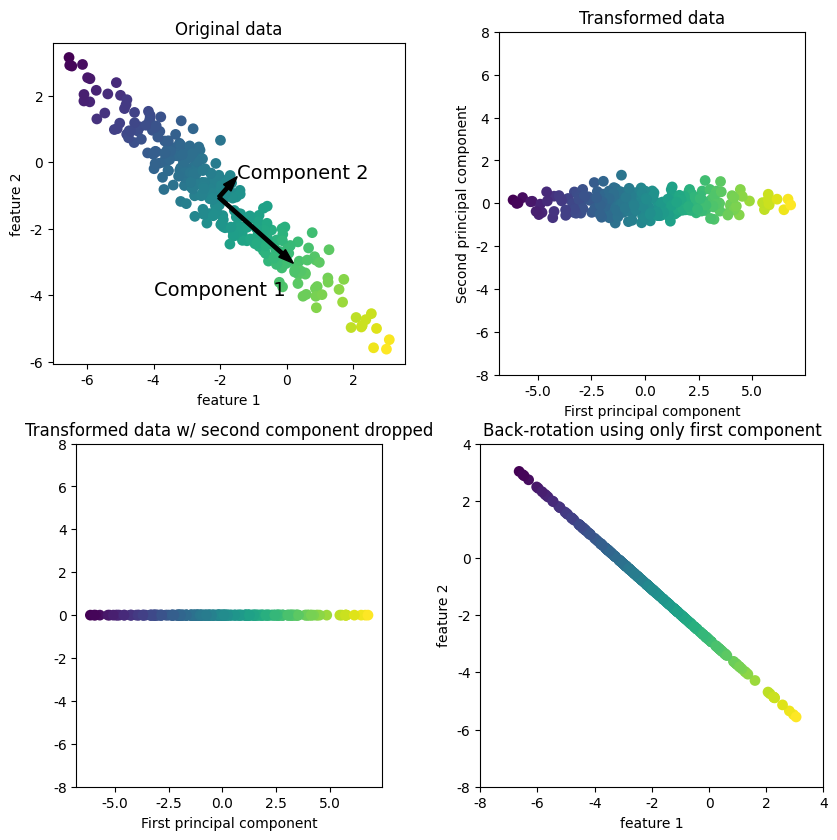

In [40]:
mglearn.plots.plot_pca_illustration()

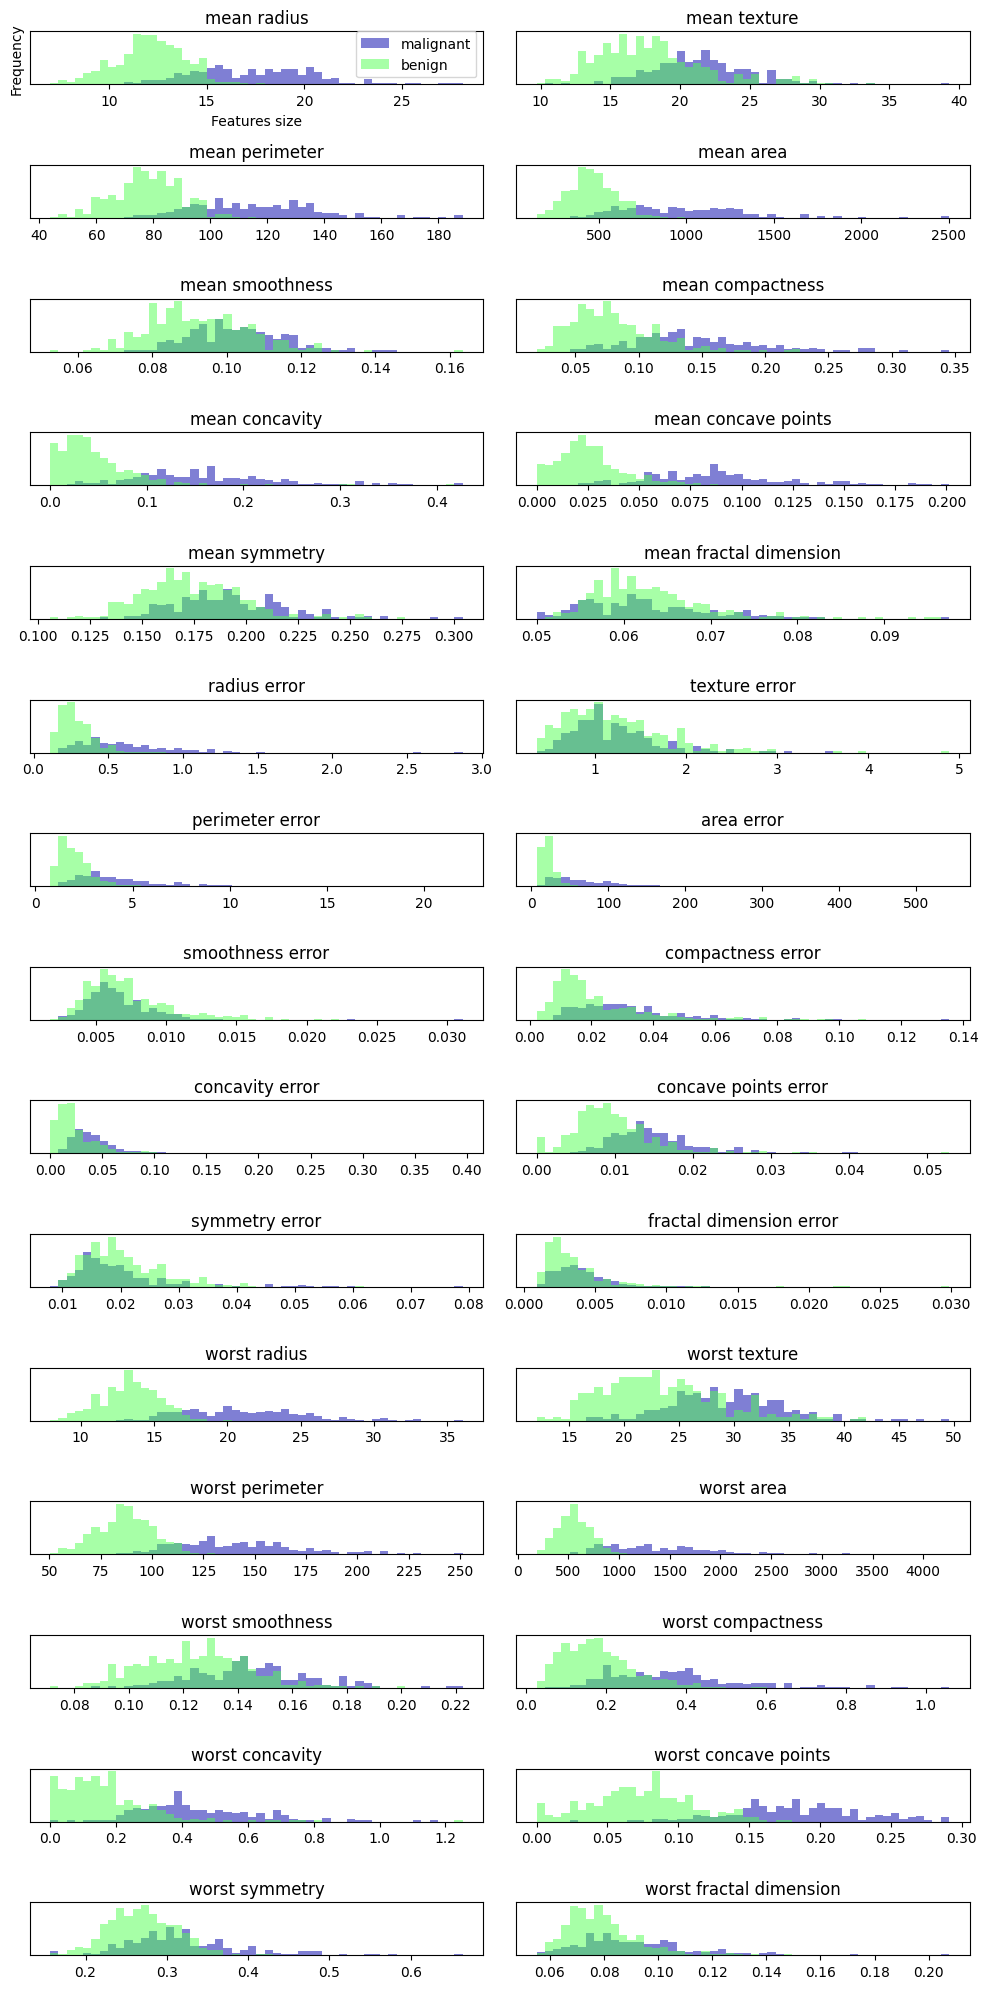

In [46]:
# PCA를 적용해 유방암 데이터셋 시각화하기

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Features size")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [48]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
scaler = StandardScaler()

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


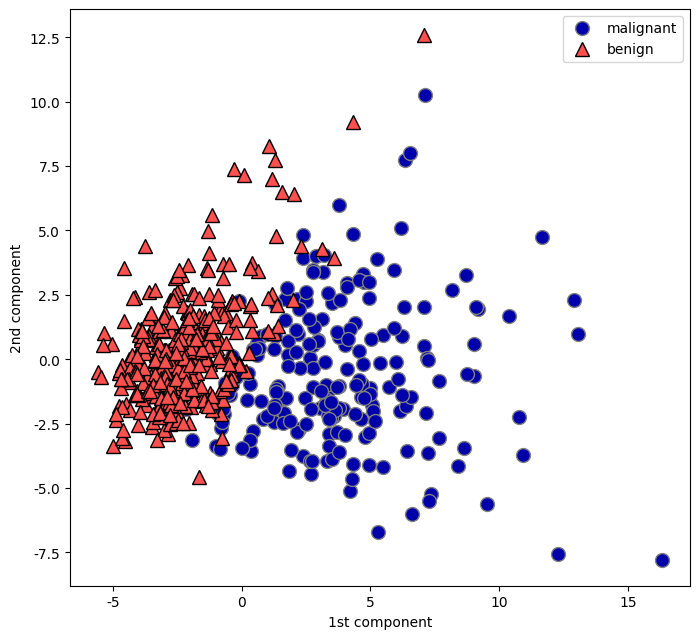

In [52]:
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

In [53]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [55]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


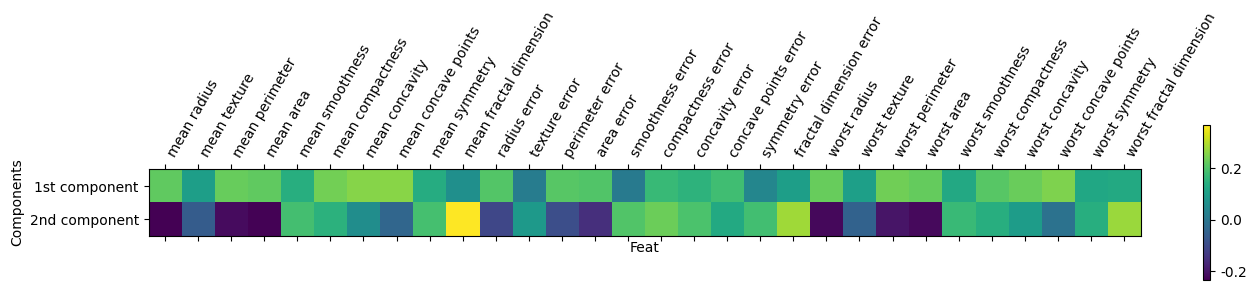

In [58]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["1st component", "2nd component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feat")
plt.ylabel("Components")
plt.show() # 책에는 없음

**고유얼굴 특성 추출**

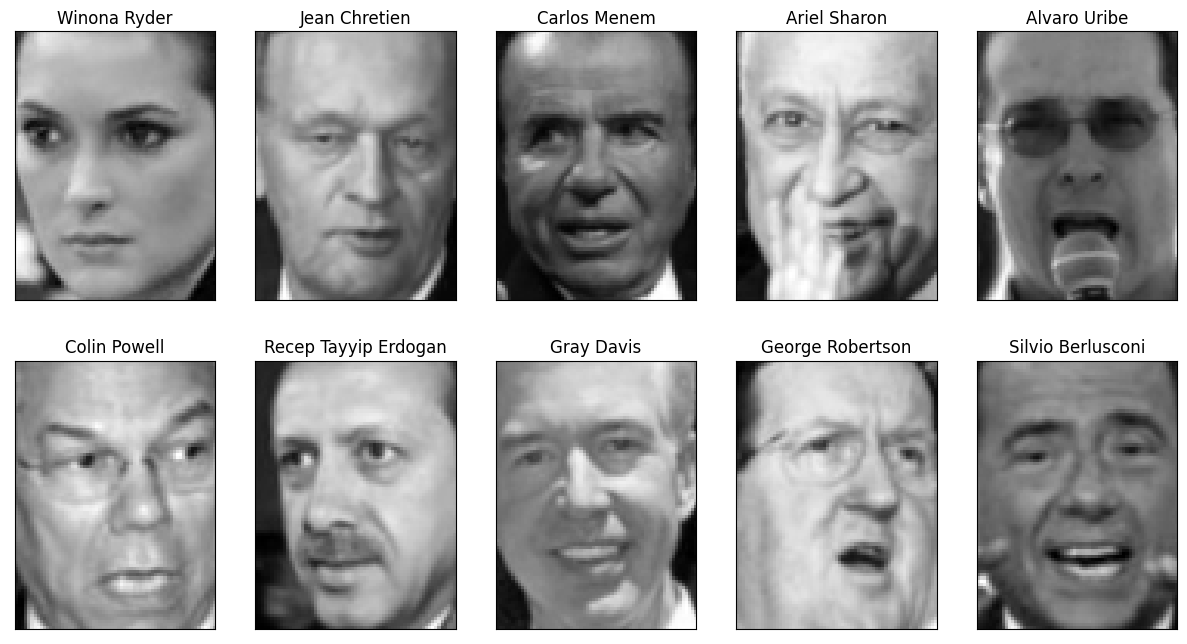

In [59]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [60]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54]),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [61]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

# 총 62명의 사진이 3023장 있고 각 사진의 pixel은 87*65이다!

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [62]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [63]:
#데이터의 편중을 없애기 위해 사람마다 50개의 이미지만 선택 (일종의 scaling)

mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


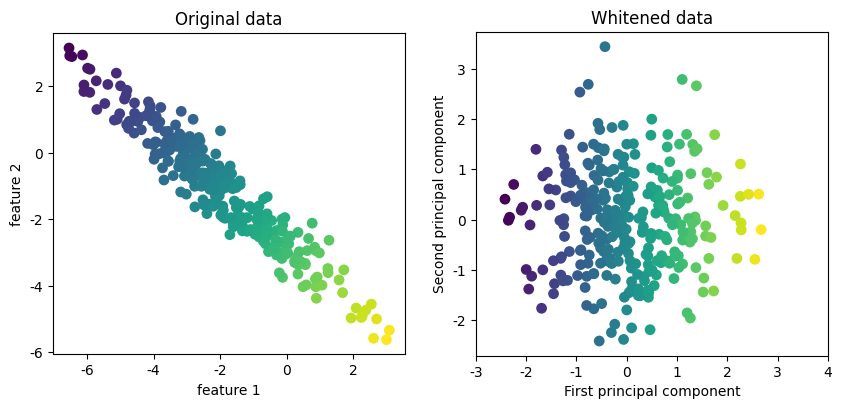

In [65]:
mglearn.plots.plot_pca_whitening() # 주성분의 scale이 같아지도록 조정하는 옵션

In [66]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [67]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


In [68]:
print("pca.components_.shape:", pca.components_.shape)

pca.components_.shape: (100, 5655)


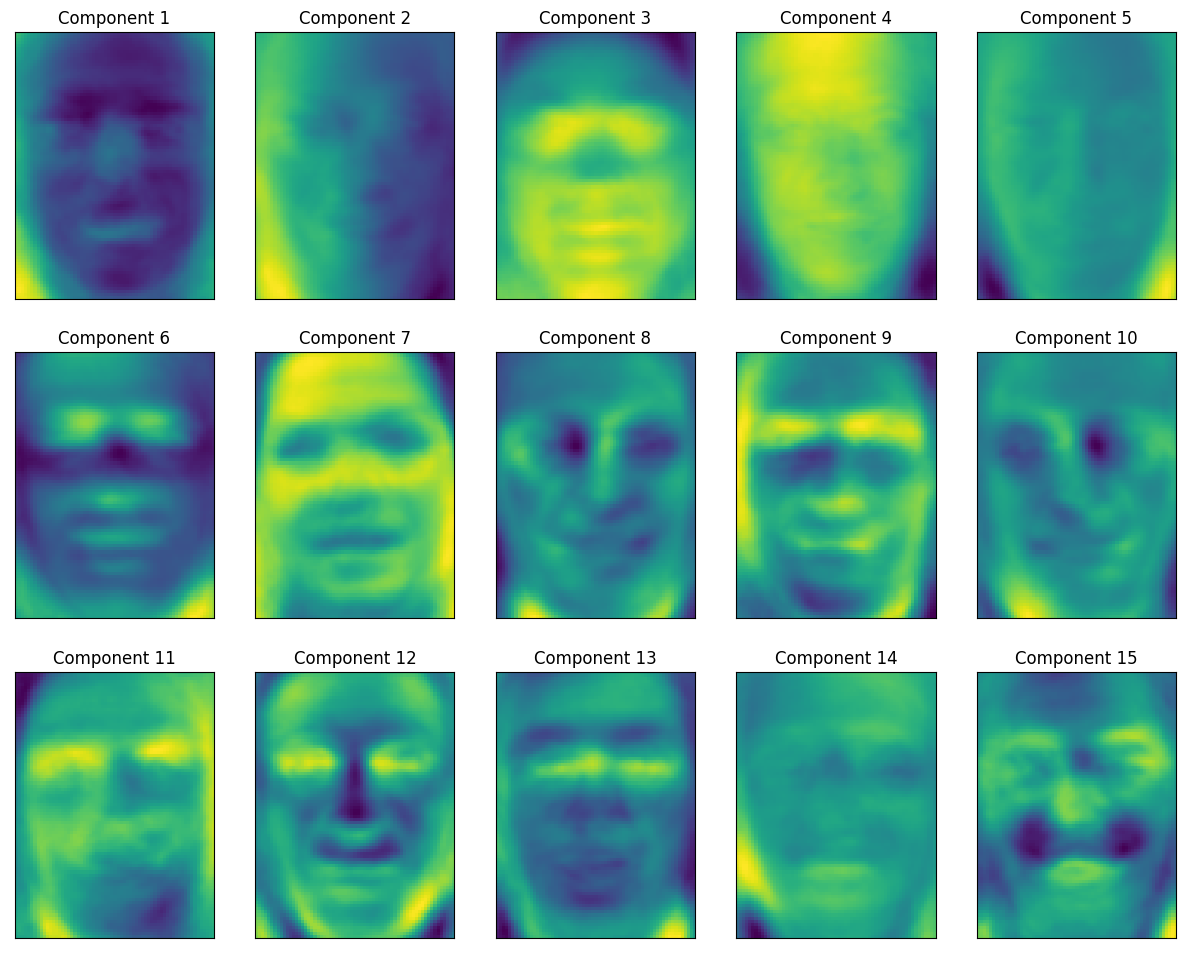

In [70]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("Component {}".format((i + 1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 9.3s, 0.2min


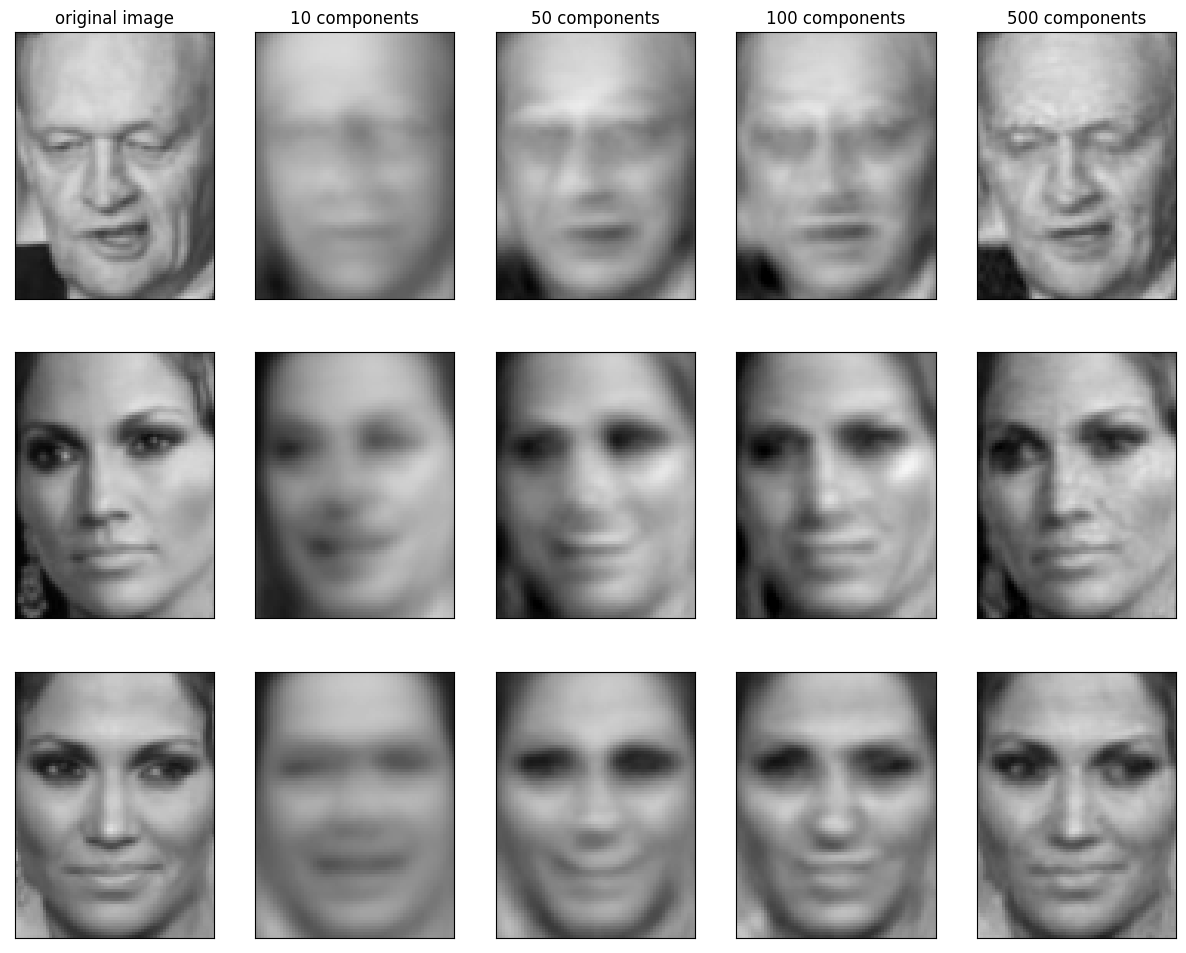

In [71]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


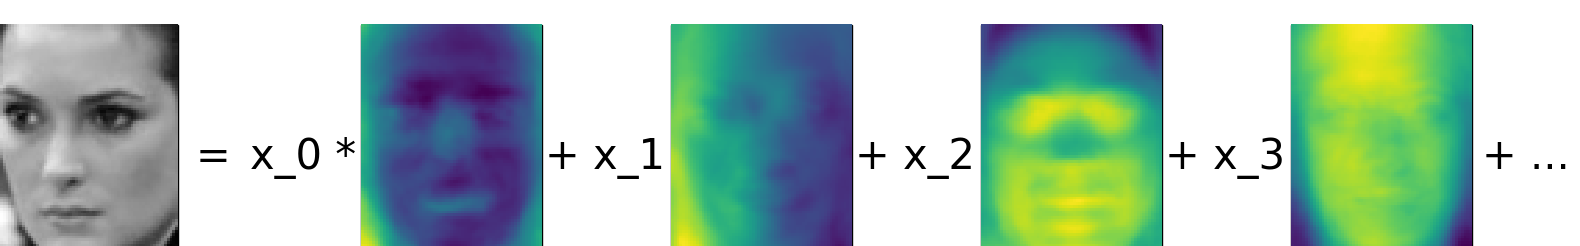

In [72]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

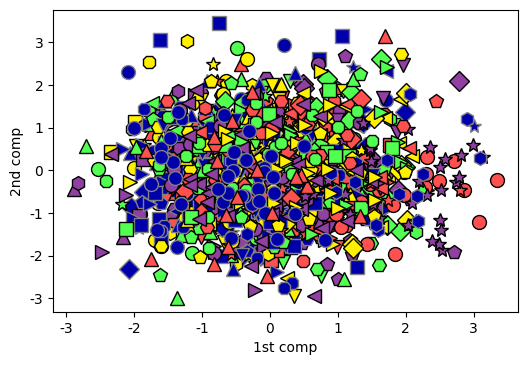

In [76]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("1st comp")
plt.ylabel("2nd comp")
plt.show() 

**설명된 분산의 비율**

In [79]:
np.sum(pca.explained_variance_ratio_)

0.9027751

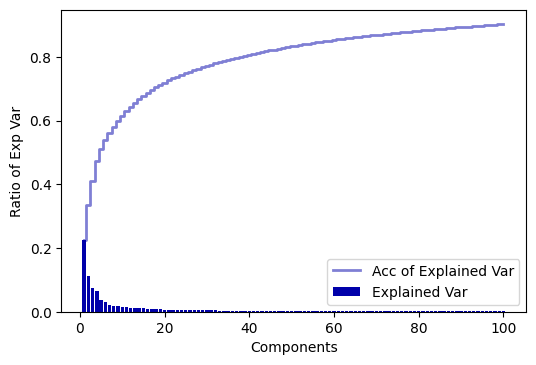

In [81]:
plt.bar(range(1,101), pca.explained_variance_ratio_,  
        align='center', label='Explained Var')
plt.step(range(1,101), np.cumsum(pca.explained_variance_ratio_), alpha=0.5, 
         where='mid', label='Acc of Explained Var')
plt.ylabel('Ratio of Exp Var')
plt.xlabel('Components')
plt.legend()
plt.show()

In [83]:
pca = PCA(n_components=0.8, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("주성분 개수: ", pca.n_components_)

테스트 세트 정확도: 0.30
주성분 개수:  38


**비음수 행렬 분해(NMF)**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


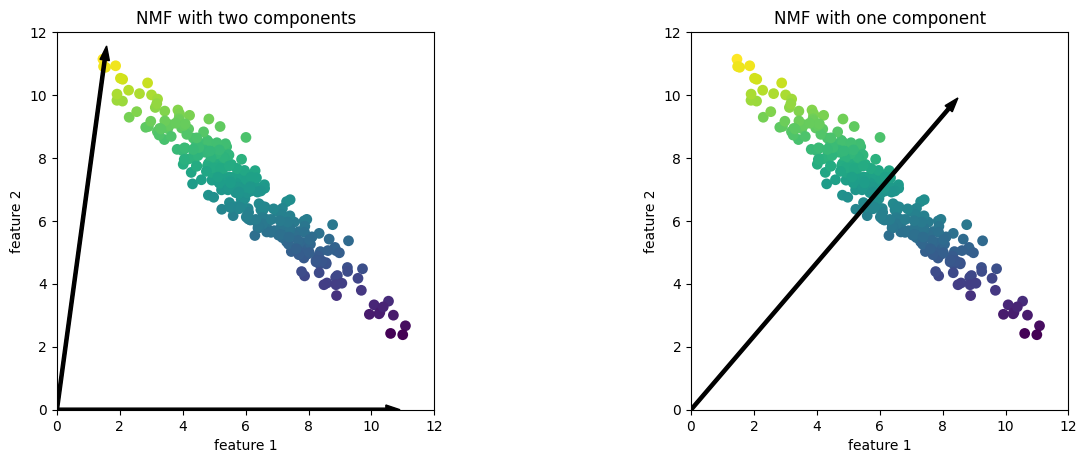

In [77]:
mglearn.plots.plot_nmf_illustration()

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: Fu

_____________________________________________________nmf_faces - 650.5s, 10.8min


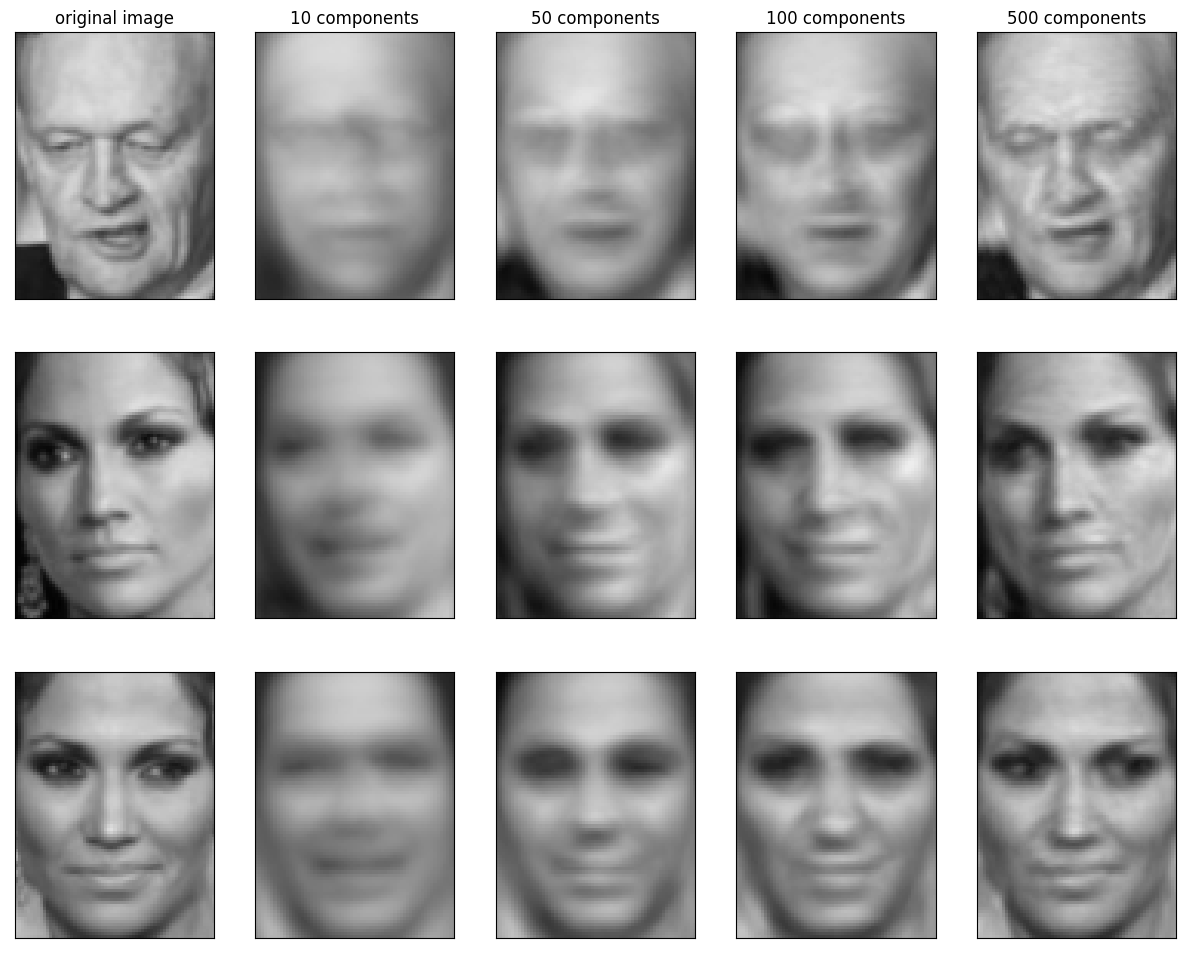

In [78]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

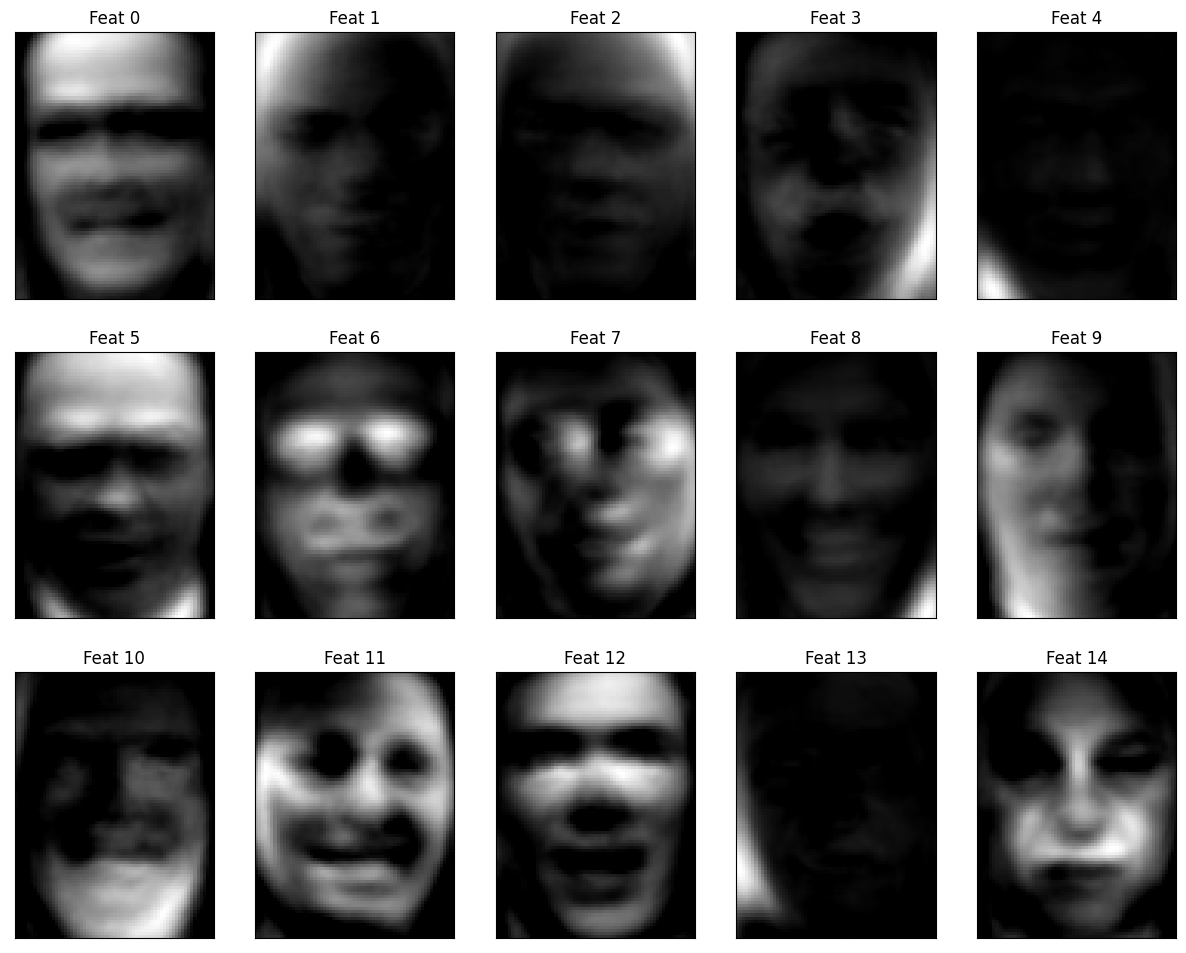

In [84]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("Feat {}".format(i))

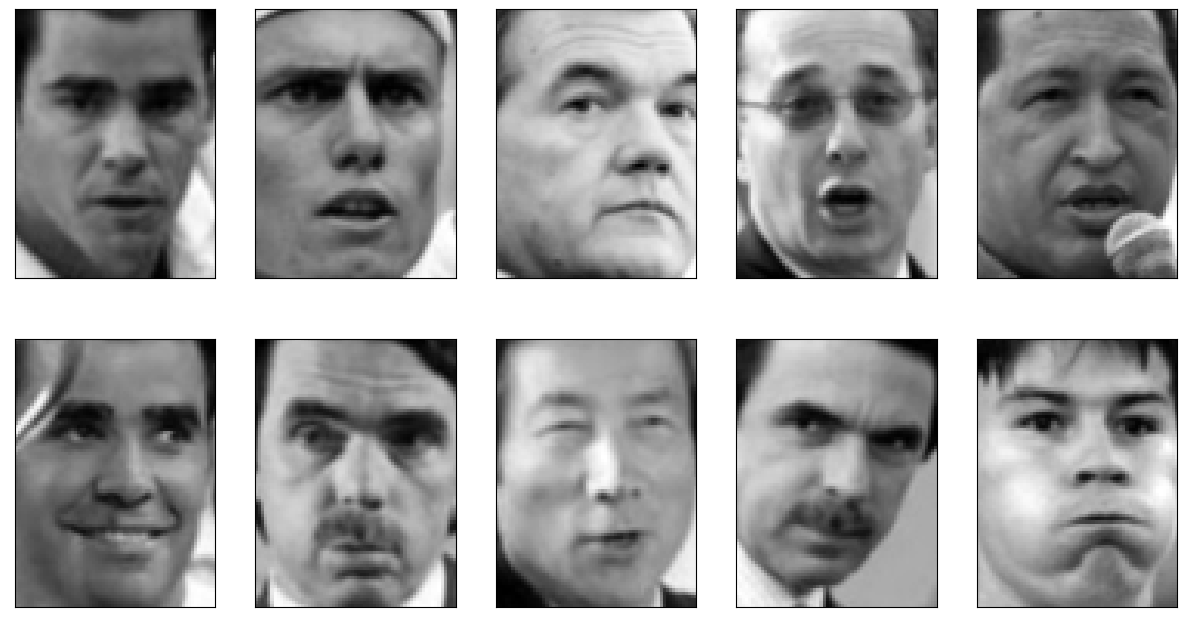

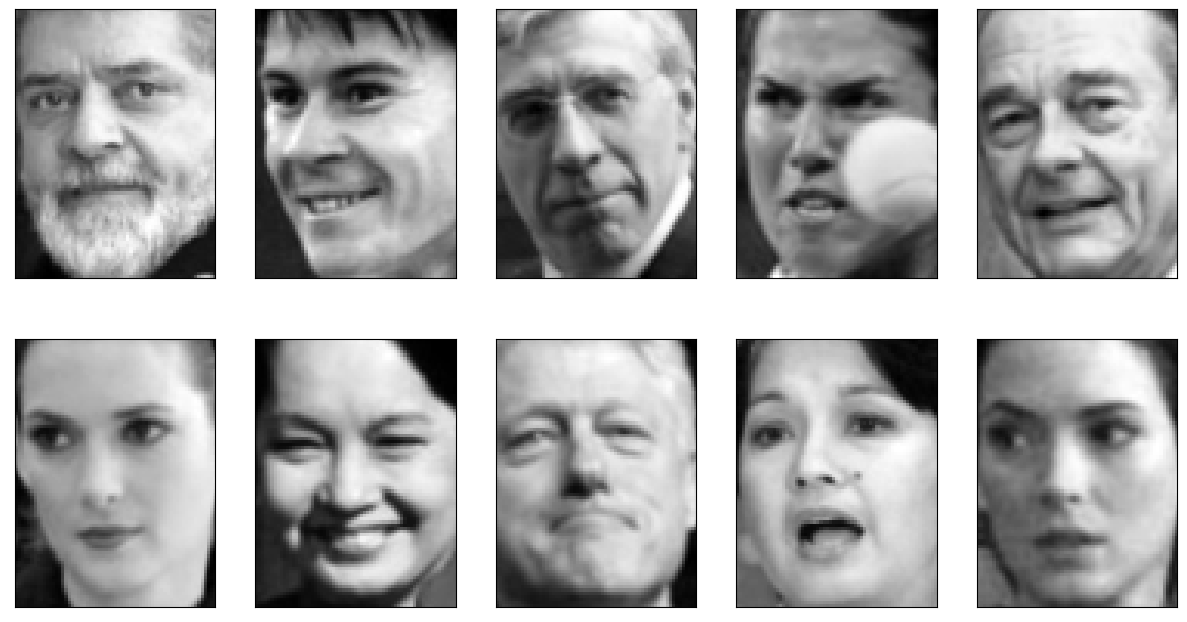

In [85]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

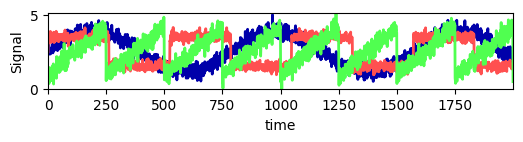

In [87]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel("Signal")
plt.margins(0)

In [88]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만듭니다
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("측정 데이터 형태:", X.shape)

측정 데이터 형태: (2000, 100)


In [90]:
nmf = NMF(n_components=3, init='nndsvd', random_state=42, max_iter=1000, tol=1e-2)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태:", S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [93]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)
print("복원한 PCA 신호 데이터 형태", H.shape)

복원한 PCA 신호 데이터 형태 (2000, 3)


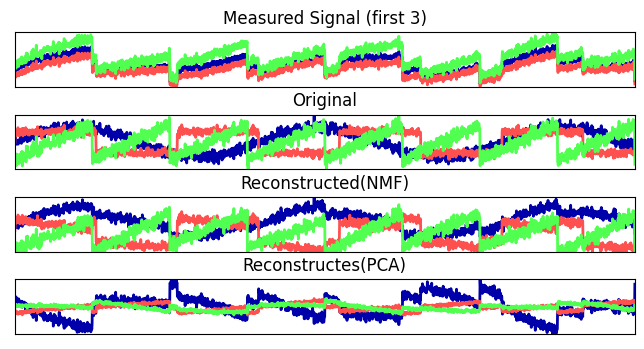

In [95]:
models = [X, S, S_, H]
names = ['Measured Signal (first 3)',
         'Original',
         'Reconstructed(NMF)', 
         'Reconstructes(PCA)']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
    ax.margins(0)

**t-SNE를 이용한 매니폴드 학습**

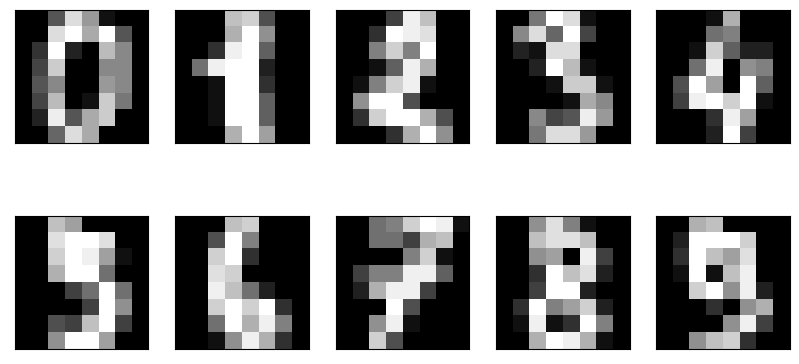

In [96]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

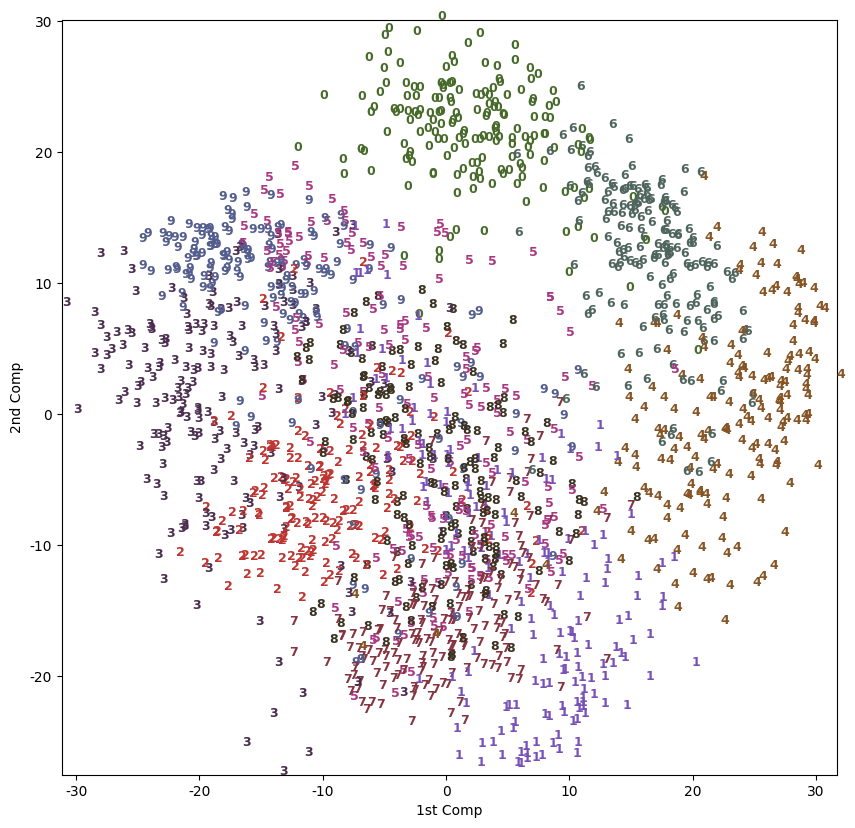

In [98]:
# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st Comp")
plt.ylabel("2nd Comp")
plt.show() # 책에는 없음

In [99]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
                        
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

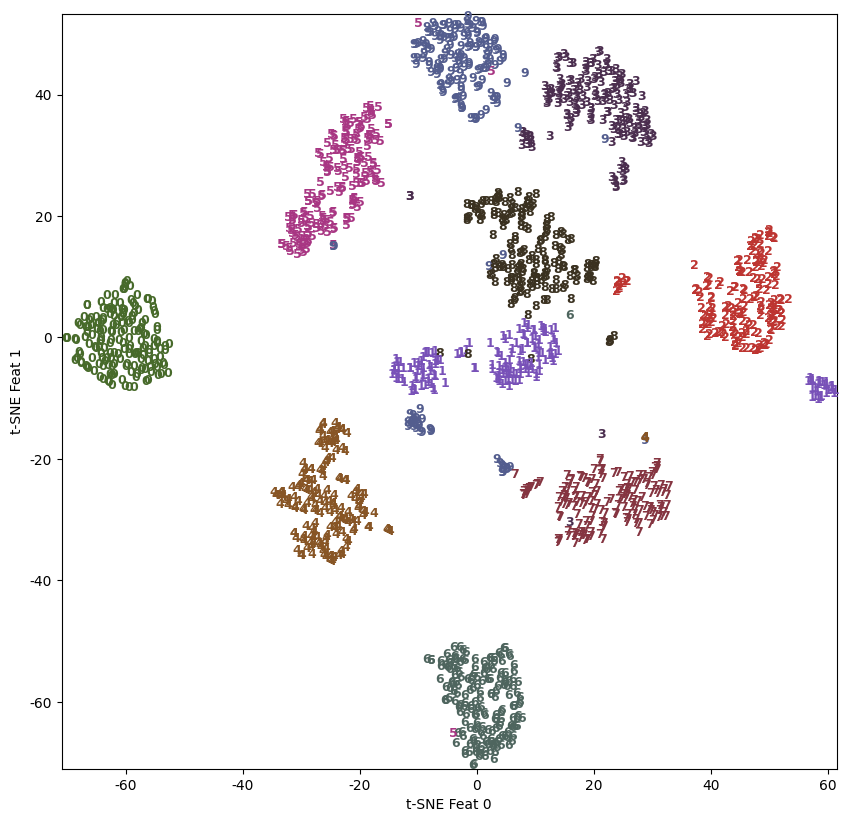

In [101]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE Feat 0")
plt.ylabel("t-SNE Feat 1")
plt.show() # 책에는 없음